Возьмем данные о компаниях, входящих в esg500. Будем работать с такими данными как 'environmentScore', 'socialScore', 'governanceScore', 'totalEsg', 'marketCap'. Выведем некотрые характеристики этих столбцов

In [ ]:
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
from scipy import stats
import seaborn as sns
from itertools import *

df = pd.read_csv('sp500_esg_data.csv')
pd.set_option('display.max_columns', None)
data = df[['environmentScore', 'socialScore', 'governanceScore', 'totalEsg', 'marketCap']]
print(data.describe())

       environmentScore  socialScore  governanceScore    totalEsg  \
count        426.000000   426.000000       426.000000  426.000000   
mean           5.784343     9.071009         6.701009   21.556150   
std            5.091763     3.663293         2.165417    6.898711   
min            0.000000     0.760000         2.960000    7.080000   
25%            1.780000     6.662500         5.252500   16.410000   
50%            4.085000     8.905000         6.085000   21.070000   
75%            8.992500    11.212500         7.637500   26.020000   
max           24.980000    22.480000        19.430000   41.660000   

          marketCap  
count  4.260000e+02  
mean   1.094058e+11  
std    3.112613e+11  
min    6.389306e+09  
25%    2.054353e+10  
50%    4.029131e+10  
75%    8.615946e+10  
max    3.296097e+12  


Среднее значения экологической оценки environmentScore не близка к значению 50% квантиля, что может быть связано с тем, что компании профилируются в разных отраслях, поэтому стоит посмотреть среднюю экологическую оценку в каждой из отраслей и учесть количество каждых компаний в них

Средние значения социальной, государственной и общей оценки близки к своим медианным. Стоит проверить их выборки на нормальность.

Среднее же значение рыночной капитализации и её медианное значение сильно не совпадает, что скорее всего связано с типом отрасли. Необходим анализ отраслей, которым принадлежат компании.



## Визуальный анализ (гистотраммы)
Построим гистаграммы ниших данных и поверх них нанесем нормальное распределение с параметрами этих выборок

Видим, что 2 параметра - environmentScore и marketCap точно не отвечают нормальному распределению

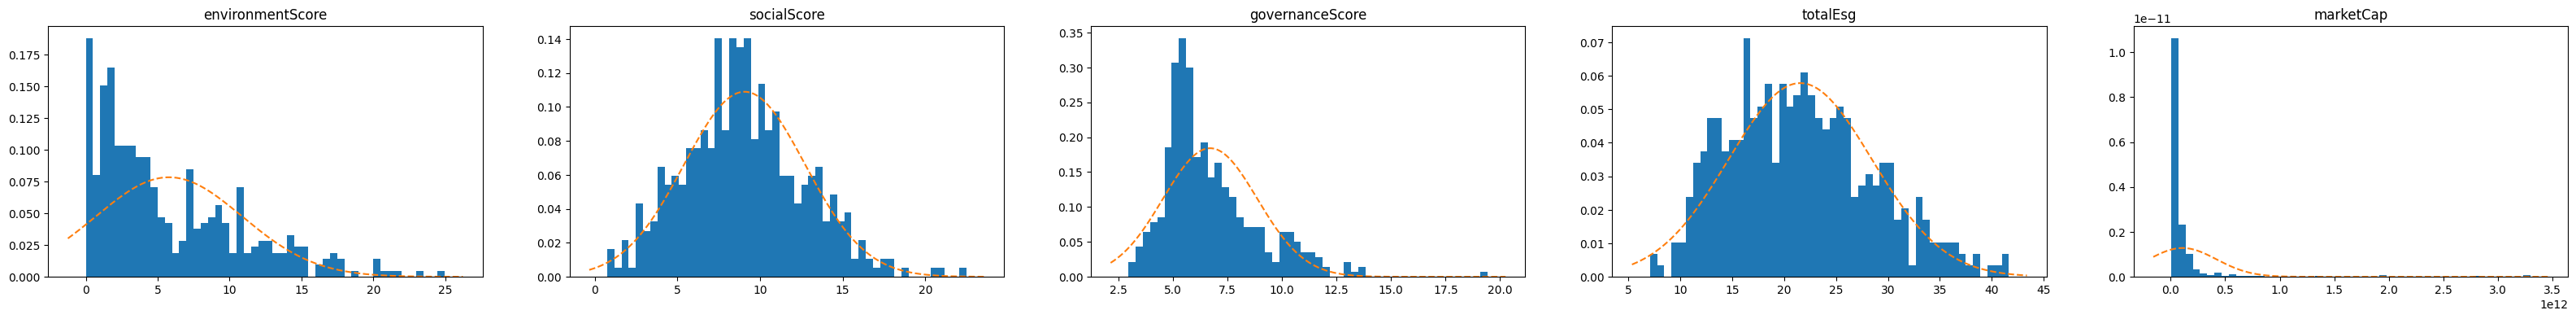

In [ ]:
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
from scipy import stats
import seaborn as sns
from itertools import *

df = pd.read_csv('sp500_esg_data.csv')
pd.set_option('display.max_columns', None)

# df.to_excel("companies.xlsx", sheet_name="Sheet1")

keys = ['environmentScore', 'socialScore', 'governanceScore', 'totalEsg', 'marketCap']

fig, axes = plt.subplots(ncols=len(keys))
fig.set_size_inches(8 * len(keys), 4)
axes = axes.flatten()

for key, ax in zip(keys, axes):
    ax.hist(df[key], density=True, bins=50)
    loc = df[key].mean()
    scale = df[key].std()

    x_left, x_right = ax.get_xlim()
    x = np.linspace(x_left, x_right, 1000)
    y = stats.norm.pdf(x, loc=loc, scale=scale)

    ax.plot(x, y, linestyle='dashed')
    ax.set_title(key)
plt.show()

## Анализ экологических очков


               GICS Sector  count        cap  percent_comp  percent_cap
0   Communication Services     14  10.022182      3.286385    10.022182
1   Consumer Discretionary     47  10.863610     11.032864    10.863610
2         Consumer Staples     34   6.846846      7.981221     6.846846
3                   Energy     20   3.362257      4.694836     3.362257
4               Financials     65  12.000319     15.258216    12.000319
5              Health Care     51  12.214411     11.971831    12.214411
6              Industrials     62   7.343328     14.553991     7.343328
7   Information Technology     54  30.958694     12.676056    30.958694
8                Materials     23   1.579173      5.399061     1.579173
9              Real Estate     28   2.436966      6.572770     2.436966
10               Utilities     28   2.372214      6.572770     2.372214


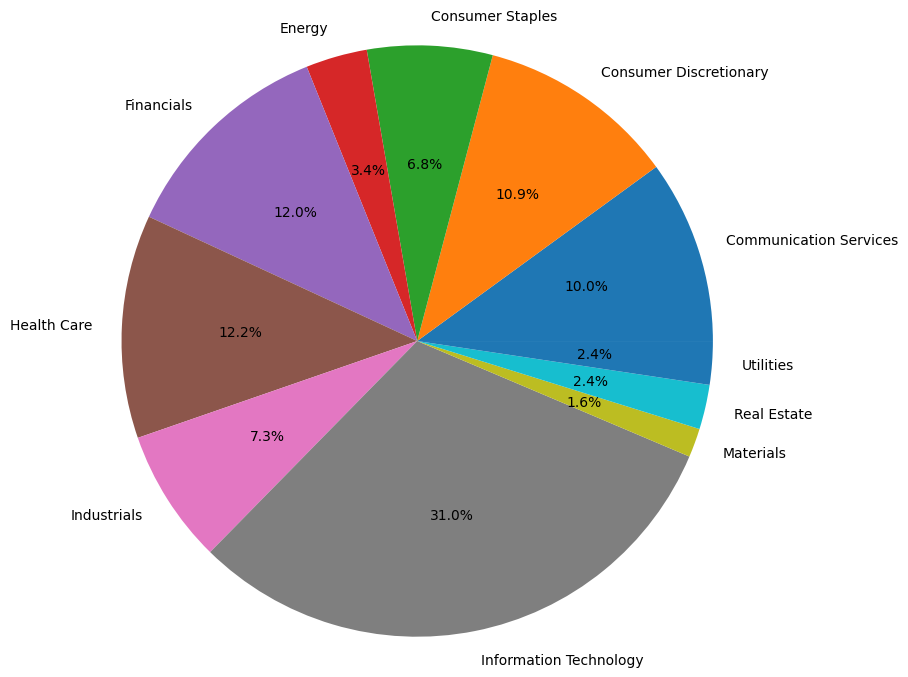

In [ ]:
# print(df['GICS Sub-Industry'].unique())
'''
def cap(s):


def percentage(s):
  return round(s.count()/df.shape[0] * 100, 3)

pd.set_option('display.max_rows', None)
agg_func_describe = {'environmentScore': ['count', percentage, cap]}
sectors = df.groupby(['GICS Sector']).agg(agg_func_describe).reset_index()
print(sectors.rename(columns={'environmentScore': ' '}))
'''
sector_summary = df.groupby('GICS Sector').agg(
    count=('Full Name', 'size'),  # Количество компаний в секторе
    cap=('marketCap', 'sum')      # Общая капитализация компаний в секторе
).reset_index()

# Вычисление процента относительно всех компаний
sector_summary['percent_comp'] = (sector_summary['count'] / sector_summary['count'].sum()) * 100
sector_summary['percent_cap'] = (sector_summary['cap'] / df['marketCap'].sum()) * 100

sector_summary['cap'] = sector_summary['percent_cap']

# Сортировка по сектору (опционально)
sector_summary = sector_summary.sort_values(by='GICS Sector')

# Вывод результата
print(sector_summary)

plt.pie(sector_summary['percent_cap'], labels = sector_summary['GICS Sector'], autopct='%1.1f%%', radius=2)
plt.show()




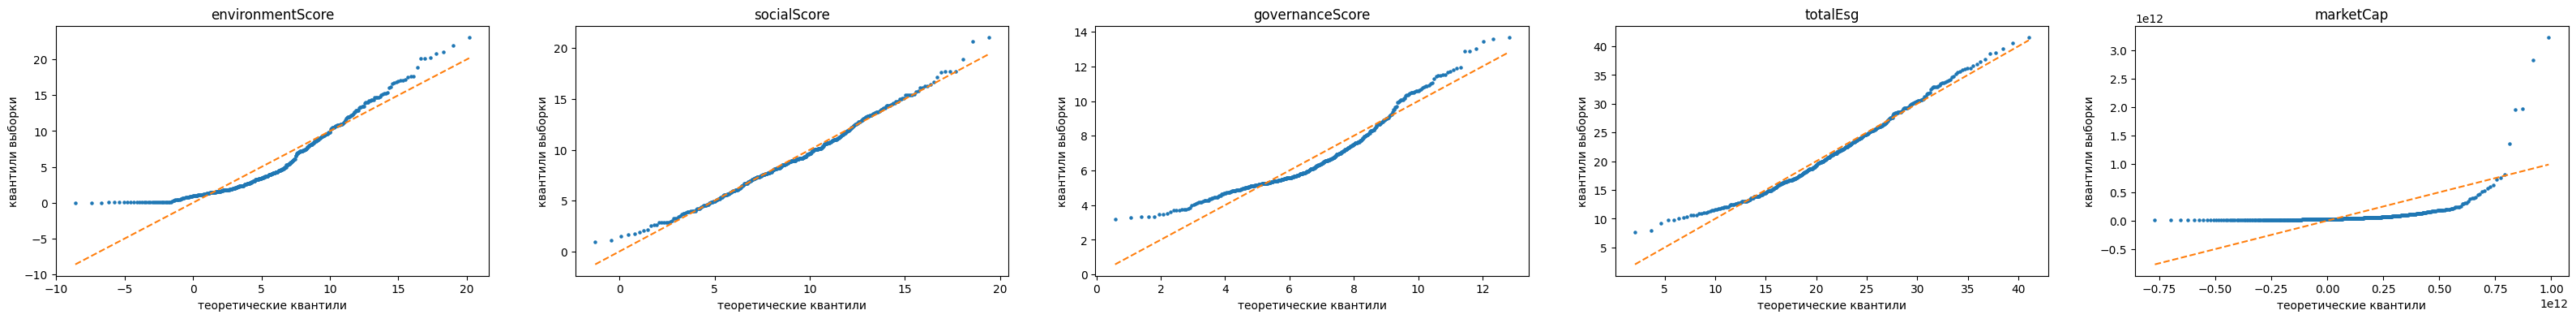

In [ ]:
fig, axes = plt.subplots(ncols=len(keys))
fig.set_size_inches(8 * len(keys), 4)
axes = axes.flatten()

for key, ax in zip(keys, axes):
    samples = df[key]

    loc = samples.mean()
    scale = samples.std()

    interval = np.linspace(0, 1, samples.shape[0])[1:-1]
    x = stats.norm.ppf(interval, loc=loc, scale=scale)
    y = np.quantile(samples, interval)

    ax.scatter(x, y, s=5)
    ax.plot(x, x, color='C1', linestyle='dashed')

    ax.set_title(key)
    ax.set_xlabel('теоретические квантили')
    ax.set_ylabel('квантили выборки')

In [ ]:
for key in keys:
    print(key)

    samples = df[key]

    loc = samples.mean()
    scale = samples.std()

    for i in range(1, 4):
        true_value = stats.norm.cdf(i) - stats.norm.cdf(-i)
        sample_value = ((samples >= loc - i * scale) & (samples <= loc + i * scale)).sum() / samples.shape[0]
        difference = sample_value - true_value

        print(f'{i} sigma(s)')
        print(f'\ttheoretical:\t{true_value}')
        print(f'\tsample:\t\t{sample_value}')
        print(f'\tdifference:\t{difference}')

    print()

environmentScore
1 sigma(s)
	theoretical:	0.6826894921370859
	sample:		0.7276995305164319
	difference:	0.04501003837934603
2 sigma(s)
	theoretical:	0.9544997361036416
	sample:		0.9507042253521126
	difference:	-0.003795510751528952
3 sigma(s)
	theoretical:	0.9973002039367398
	sample:		0.9906103286384976
	difference:	-0.006689875298242165

socialScore
1 sigma(s)
	theoretical:	0.6826894921370859
	sample:		0.6690140845070423
	difference:	-0.013675407630043601
2 sigma(s)
	theoretical:	0.9544997361036416
	sample:		0.9624413145539906
	difference:	0.00794157845034904
3 sigma(s)
	theoretical:	0.9973002039367398
	sample:		0.9929577464788732
	difference:	-0.004342457457866544

governanceScore
1 sigma(s)
	theoretical:	0.6826894921370859
	sample:		0.7535211267605634
	difference:	0.07083163462347752
2 sigma(s)
	theoretical:	0.9544997361036416
	sample:		0.9553990610328639
	difference:	0.0008993249292222893
3 sigma(s)
	theoretical:	0.9973002039367398
	sample:		0.9906103286384976
	difference:	-0.006689

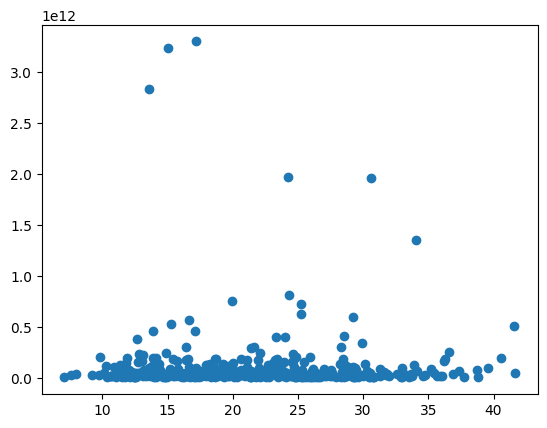

0.014025271589523935
0.0043565121326564205
0.018627748608269212
9.160533562624362e-05


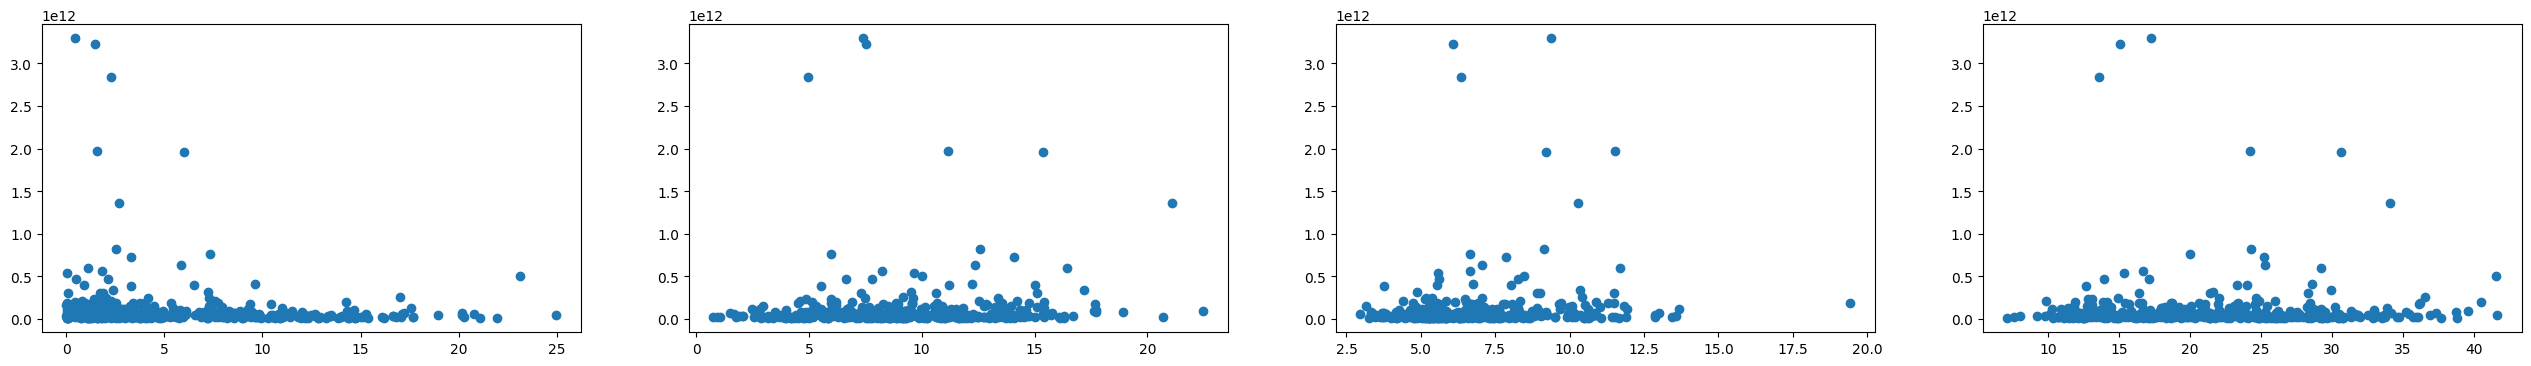

In [ ]:
def sum_of_squares(samples: np.ndarray) -> float:
      return ((samples - samples.mean()) ** 2).sum()


keys = ['environmentScore', 'socialScore', 'governanceScore', 'totalEsg']
fig, axes = plt.subplots(ncols=len(keys))
fig.set_size_inches(8 * len(keys), 4)
axes = axes.flatten()

for key, ax in zip(keys, axes):
  ones = np.ones((426,1))
  x_pot = np.hstack((ones, df[key].values.reshape(426,1)))
  XTX = x_pot.T.dot(x_pot)
  XTX_inv = np.linalg.inv(XTX)

  b = XTX_inv.dot(x_pot.T).dot(df['marketCap'])
  z = x_pot.dot(b)
  e = df['marketCap'] - z
  ax.scatter(df[key], df['marketCap'])
  R = 1 - sum_of_squares(e) / sum_of_squares(np.array(df['marketCap']))
  print(R)

plt.show()

In [ ]:
anova_result = stats.f_oneway(*[group['environmentScore'] for name, group in df.groupby('GICS Sector')])
print("Дисперсионный анализ (ANOVA):")
print(anova_result)

Дисперсионный анализ (ANOVA):
F_onewayResult(statistic=85.34538875132516, pvalue=3.4658256530627476e-94)


In [ ]:
import statsmodels.api as sm

# Преобразование категориальной переменной 'GICS Sector' в фиктивные переменные
df_dummies = pd.get_dummies(df, columns=['GICS Sector'], drop_first=True)
df['environmentScore'] = pd.to_numeric(df['environmentScore'], errors='coerce')

# Определение зависимой и независимых переменных
X = df_dummies.drop(columns=['environmentScore', 'Symbol', 'Full Name', 'GICS Sub-Industry'])
y = df_dummies['environmentScore']

# Добавление константы (intercept) в модель
X = sm.add_constant(X)

# Построение модели линейной регрессии
model = sm.OLS(y, X.astype(float)).fit()

# Вывод результатов регрессии
print("Регрессионный анализ:")
print(model.summary())

Регрессионный анализ:
                            OLS Regression Results                            
Dep. Variable:       environmentScore   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 1.471e+07
Date:                Wed, 16 Oct 2024   Prob (F-statistic):               0.00
Time:                        05:28:37   Log-Likelihood:                 1565.8
No. Observations:                 426   AIC:                            -3092.
Df Residuals:                     406   BIC:                            -3011.
Df Model:                          19                                         
Covariance Type:            nonrobust                                         
                                         coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------

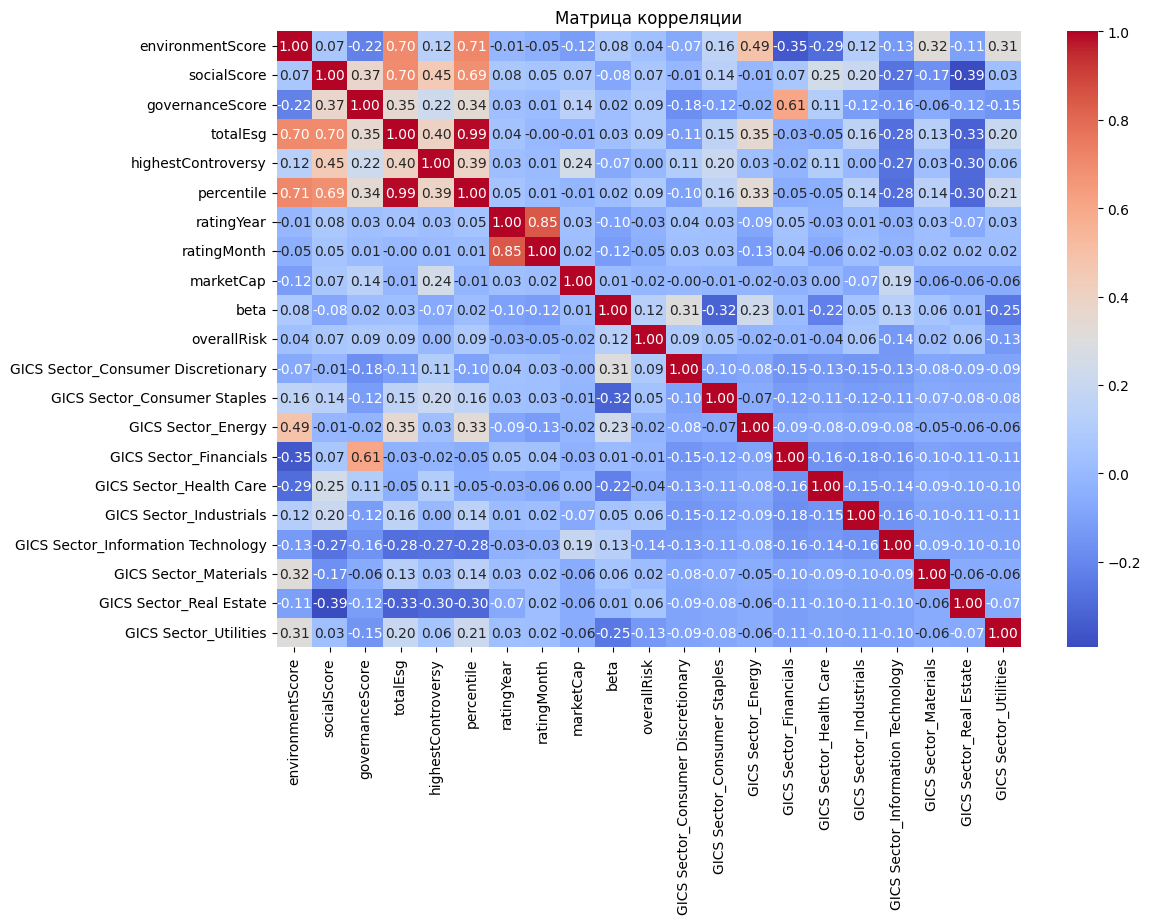

['Symbol', 'Full Name', 'GICS Sector', 'GICS Sub-Industry', 'environmentScore', 'socialScore', 'governanceScore', 'totalEsg', 'highestControversy', 'percentile', 'ratingYear', 'ratingMonth', 'marketCap', 'beta', 'overallRisk']


KeyError: "['GICS Sector'] not found in axis"

In [ ]:
# Преобразование столбца 'environmentScore' в числовые значения
df['environmentScore'] = pd.to_numeric(df['environmentScore'], errors='coerce')



# Преобразование категориальной переменной 'GICS Sector' в фиктивные переменные
df_dummies = pd.get_dummies(df, columns=['GICS Sector'], drop_first=True)

# Вычисление матрицы корреляции
corr_matrix = df_dummies.corr(numeric_only = True)

# Визуализация матрицы корреляции
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Матрица корреляции')
plt.show()

import statsmodels.api as sm

# Определение зависимой и независимых переменных
print(df.columns.tolist())
X = df_dummies.drop(columns=['environmentScore', 'Symbol', 'Full Name', 'GICS Sub-Industry', 'GICS Sector'])
y = df_dummies['environmentScore']

# Добавление константы (intercept) в модель
X = sm.add_constant(X)

# Построение модели линейной регрессии
model = sm.OLS(y, X).fit()

# Вывод результатов регрессии
print("Регрессионный анализ после удаления незначимых переменных:")
print(model.summary())

from statsmodels.stats.outliers_influence import variance_inflation_factor

# Вычисление VIF для каждой переменной
vif_data = pd.DataFrame()
vif_data["feature"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(len(X.columns))]

print("VIF данные:")
print(vif_data)

# Вывод результатов регрессии
print("Регрессионный анализ после удаления незначимых переменных и проверки на мультиколлинеарность:")
print(model.summary())